<a href="https://colab.research.google.com/github/bhavanisanda/machine-learning/blob/main/stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
path=('/content/gdrive/MyDrive')
os.chdir(path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
data=pd.read_excel('HR Attrition.xlsx',na_values=['?','#'])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,College,Life Sciences,1,Medium,Female,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Below_college,Life Sciences,2,High,Male,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,College,Other,4,Very high,Male,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Master,Life Sciences,5,Very high,Female,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Below_college,Medical,7,Low,Male,...,Very High,80,1,6,3,Better,2,2,2,2


In [ ]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,Research & Development,23,College,Medical,2061,High,Male,...,High,80,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,Below_college,Medical,2062,Very high,Male,...,Low,80,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,Bachelor,Life Sciences,2064,Medium,Male,...,Medium,80,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,Bachelor,Medical,2065,Very high,Male,...,Very High,80,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,Research & Development,8,Bachelor,Medical,2068,Medium,Male,...,Low,80,0,6,3,Best,4,3,1,2


In [ ]:
data.shape

(1470, 31)

In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance             object
YearsAtCompany               int64
YearsInCurrentRole  

In [ ]:
data.describe()

,Age,DistanceFromHome,EmployeeNumber,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,1024.865306,2.063946,6502.931293,2.693197,15.209524,80.0,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,602.024335,1.106940,4707.956783,2.498009,3.659938,0.0,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,491.250000,1.000000,2911.000000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,1020.500000,2.000000,4919.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,1555.750000,3.000000,8379.000000,4.000000,18.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,2068.000000,5.000000,19999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
X_train_num.corr()

,Age,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.017117,0.512254,0.501641,0.292043,-0.003571,0.039603,0.683003,-0.012771,0.315126,0.218024,0.222307,0.194142
DistanceFromHome,-0.017117,1.000000,-0.002973,-0.031037,-0.028131,0.040397,0.056106,-0.003875,-0.035385,0.008817,0.024662,-0.004087,0.007351
JobLevel,0.512254,-0.002973,1.000000,0.950604,0.142490,-0.042017,0.003978,0.779709,-0.017041,0.524839,0.375665,0.345154,0.360211
MonthlyIncome,0.501641,-0.031037,0.950604,1.000000,0.150311,-0.039264,-0.006711,0.769732,-0.024827,0.505009,0.351335,0.338843,0.326225
NumCompaniesWorked,0.292043,-0.028131,0.142490,0.150311,1.000000,-0.012032,0.037626,0.224989,-0.070956,-0.132875,-0.098915,-0.040052,-0.125435
PercentSalaryHike,-0.003571,0.040397,-0.042017,-0.039264,-0.012032,1.000000,-0.003657,-0.031406,-0.028894,-0.046994,-0.012352,-0.031929,-0.022672
StockOptionLevel,0.039603,0.056106,0.003978,-0.006711,0.037626,-0.003657,1.000000,0.008553,0.014993,-0.005244,0.027746,0.000837,0.009361
TotalWorkingYears,0.683003,-0.003875,0.779709,0.769732,0.224989,-0.031406,0.008553,1.000000,-0.034376,0.627308,0.454969,0.403115,0.445367
TrainingTimesLastYear,-0.012771,-0.035385,-0.017041,-0.024827,-0.070956,-0.028894,0.014993,-0.034376,1.000000,0.011534,0.004188,0.011445,0.014723
YearsAtCompany,0.315126,0.008817,0.524839,0.505009,-0.132875,-0.046994,-0.005244,0.627308,0.011534,1.000000,0.752113,0.612018,0.762986


In [ ]:
Y_train=Y_train.astype('category')
Y_test=Y_test.astype('category')

In [ ]:
Y_train.value_counts(normalize=True)

No     0.833711
Yes    0.166289
Name: Attrition, dtype: float64

In [ ]:
Y_train.value_counts(normalize=True)*100

No     83.371126
Yes    16.628874
Name: Attrition, dtype: float64

In [ ]:
Y_train.value_counts()

No     1103
Yes     220
Name: Attrition, dtype: int64

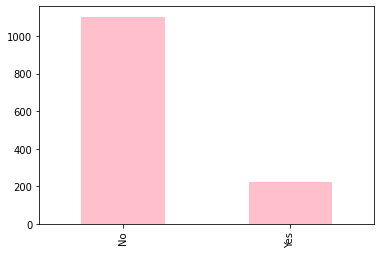

In [ ]:
Y_train.value_counts().plot(kind='bar',color='pink')

In [ ]:
Y_train

1088     No
1151     No
472      No
1282     No
857     Yes
       ... 
1041     No
1122     No
1346     No
1406     No
1389     No
Name: Attrition, Length: 1323, dtype: category
Categories (2, object): ['No', 'Yes']

In [ ]:
plt.bar(Y_train.value_counts(), color ='blue',width = 0.4,height=4)
plt.xlabel("Attrition")
plt.ylabel("value_counts")
plt.title("Attrition barplot")
plt.show()


KeyError: ignored

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


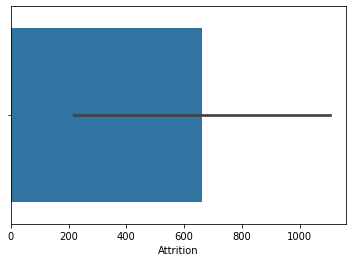

In [ ]:
sns.barplot(Y_train.value_counts(),data=data)
plt.show()

In [ ]:
#data.select_dtypes(include=object)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data.loc[:,data.columns!='Attrition'],data.loc[:,'Attrition'],test_size=0.1,random_state=123)

In [ ]:
catcols=data.select_dtypes(include=object).columns
catcols=catcols.drop(['Attrition'])
#catcols.extend(['StockOptionLevel','Job Level'])

In [ ]:
X_train.drop(['EmployeeNumber','StandardHours'],axis=1,inplace=True)
X_test.drop(['EmployeeNumber','StandardHours'],axis=1,inplace=True)

In [ ]:
X_train[catcols]=X_train[catcols].astype('category')
X_test[catcols]=X_test[catcols].astype('category')
X_train.isna().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
X_train_num=X_train.drop(catcols,axis=1)
X_train_cat=X_train[catcols]
X_train_cat.isna().sum()

BusinessTravel              0
Department                  0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
WorkLifeBalance             0
dtype: int64

In [ ]:
X_test_num=X_test.drop(catcols,axis=1)
X_test_cat=X_test[catcols]

In [ ]:
imp_num=SimpleImputer(strategy='mean')
imp_cat=SimpleImputer(strategy='most_frequent')

In [ ]:
X_train_num=pd.DataFrame(imp_num.fit_transform(X_train_num),columns=X_train_num.columns)
X_test_num=pd.DataFrame(imp_num.transform(X_test_num),columns=X_test_num.columns)
X_train_cat.isna().sum()

BusinessTravel              0
Department                  0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
Over18                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
WorkLifeBalance             0
dtype: int64

In [ ]:
X_train_cat=pd.DataFrame(imp_cat.fit_transform(X_train_cat),columns=X_train_cat.columns)
X_test_cat=pd.DataFrame(imp_cat.transform(X_test_cat),columns=X_test_cat.columns)

In [ ]:
st=StandardScaler()
X_train_num=pd.DataFrame(st.fit_transform(X_train_num),columns=X_train_num.columns)
X_test_num=pd.DataFrame(st.transform(X_test_num),columns=X_test_num.columns)

In [ ]:
ohe=OneHotEncoder(handle_unknown='ignore')
X_train_cat=pd.DataFrame(ohe.fit_transform(X_train_cat).todense(),columns=ohe.get_feature_names_out())
X_test_cat=pd.DataFrame(ohe.transform(X_test_cat).todense(),columns=ohe.get_feature_names_out())
X_train_cat.isna().sum()

BusinessTravel_Non-Travel             0
BusinessTravel_Travel_Frequently      0
BusinessTravel_Travel_Rarely          0
Department_Human Resources            0
Department_Research & Development     0
Department_Sales                      0
Education_Bachelor                    0
Education_Below_college               0
Education_College                     0
Education_Doctor                      0
Education_Master                      0
EducationField_Human Resources        0
EducationField_Life Sciences          0
EducationField_Marketing              0
EducationField_Medical                0
EducationField_Other                  0
EducationField_Technical Degree       0
EnvironmentSatisfaction_High          0
EnvironmentSatisfaction_Low           0
EnvironmentSatisfaction_Medium        0
EnvironmentSatisfaction_Very high     0
Gender_Female                         0
Gender_Male                           0
JobInvolvement_High                   0
JobInvolvement_Low                    0


In [ ]:
#X_train_cat.reset_index(drop=False, inplace=True)
#X_train_num.reset_index(drop=False, inplace=True)
train=pd.concat([X_train_num,X_train_cat],axis=1)
test=pd.concat([X_test_num,X_test_cat],axis=1)
#train.isna().sum()


In [ ]:
train.shape

(1323, 69)

In [ ]:
test.shape

(147, 69)

In [ ]:
train.isna().sum()

Age                                   0
DistanceFromHome                      0
JobLevel                              0
MonthlyIncome                         0
NumCompaniesWorked                    0
                                     ..
RelationshipSatisfaction_Very High    0
WorkLifeBalance_Bad                   0
WorkLifeBalance_Best                  0
WorkLifeBalance_Better                0
WorkLifeBalance_Good                  0
Length: 69, dtype: int64

In [ ]:
Y_train=Y_train.astype('category')
Y_test=Y_test.astype('category')

In [ ]:
Y_train.isna().sum()

0

In [ ]:
mod=SVC(kernel='rbf',C=2)
mod.fit(train,Y_train)


SVC(C=2)

In [ ]:
model=SVC()
param_grid={'kernel':['rbf','poly'],'C':[1,0.3,4],'gamma':[1,2,3]}
search=GridSearchCV(model,param_grid)
search.fit(train,Y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 0.3, 4], 'gamma': [1, 2, 3],
                         'kernel': ['rbf', 'poly']})

In [ ]:
print(search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
preds_train=mod.predict(train)

In [ ]:
preds_test=mod.predict(test)

In [ ]:
print(confusion_matrix(Y_train,preds_train))
print(confusion_matrix(Y_test,preds_test))

[[1101    2]
 [  59  161]]
[[129   1]
 [  6  11]]


In [ ]:
print(classification_report(Y_train,preds_train))
print(classification_report(Y_test,preds_test))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97      1103
         Yes       0.99      0.73      0.84       220

    accuracy                           0.95      1323
   macro avg       0.97      0.87      0.91      1323
weighted avg       0.96      0.95      0.95      1323

              precision    recall  f1-score   support

          No       0.96      0.99      0.97       130
         Yes       0.92      0.65      0.76        17

    accuracy                           0.95       147
   macro avg       0.94      0.82      0.87       147
weighted avg       0.95      0.95      0.95       147



In [ ]:
######naive bayes

In [ ]:
nb=GaussianNB()
nb.fit(train,Y_train)

GaussianNB()

In [ ]:
pred_train=nb.predict(train)
pred_test=nb.predict(test)

In [ ]:
print(confusion_matrix(Y_train,pred_train))
print(confusion_matrix(Y_test,pred_test))

[[779 324]
 [ 48 172]]
[[92 38]
 [ 4 13]]


In [ ]:
print(classification_report(Y_train,pred_train))
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

          No       0.94      0.71      0.81      1103
         Yes       0.35      0.78      0.48       220

    accuracy                           0.72      1323
   macro avg       0.64      0.74      0.64      1323
weighted avg       0.84      0.72      0.75      1323

              precision    recall  f1-score   support

          No       0.94      0.71      0.81      1103
         Yes       0.35      0.78      0.48       220

    accuracy                           0.72      1323
   macro avg       0.64      0.74      0.64      1323
weighted avg       0.84      0.72      0.75      1323



In [ ]:
###### knn

In [ ]:
knn=KNeighborsClassifier()
knn.fit(train,Y_train)

KNeighborsClassifier()

In [ ]:
train_preds=knn.predict(train)
test_preds=knn.predict(test)

In [ ]:
print(confusion_matrix(Y_train,train_preds))
print(confusion_matrix(Y_test,test_preds))

[[1094    9]
 [ 171   49]]
[[125   5]
 [ 14   3]]


In [ ]:
print(classification_report(Y_train,train_preds))
print(classification_report(Y_test,test_preds))

              precision    recall  f1-score   support

          No       0.86      0.99      0.92      1103
         Yes       0.84      0.22      0.35       220

    accuracy                           0.86      1323
   macro avg       0.85      0.61      0.64      1323
weighted avg       0.86      0.86      0.83      1323

              precision    recall  f1-score   support

          No       0.90      0.96      0.93       130
         Yes       0.38      0.18      0.24        17

    accuracy                           0.87       147
   macro avg       0.64      0.57      0.58       147
weighted avg       0.84      0.87      0.85       147



In [ ]:
#### logistic regression

In [ ]:
from sklearn import linear_model

In [ ]:
logr=linear_model.LogisticRegression()
logr.fit(train,Y_train)   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
train_pred=logr.predict(train)
test_pred=logr.predict(test)

In [ ]:
print(confusion_matrix(Y_train,train_pred))
print(confusion_matrix(Y_test,test_pred))

[[1073   30]
 [ 115  105]]
[[128   2]
 [  8   9]]


In [ ]:
print(classification_report(Y_train,train_pred))
print(classification_report(Y_test,test_pred))

              precision    recall  f1-score   support

          No       0.90      0.97      0.94      1103
         Yes       0.78      0.48      0.59       220

    accuracy                           0.89      1323
   macro avg       0.84      0.73      0.76      1323
weighted avg       0.88      0.89      0.88      1323

              precision    recall  f1-score   support

          No       0.94      0.98      0.96       130
         Yes       0.82      0.53      0.64        17

    accuracy                           0.93       147
   macro avg       0.88      0.76      0.80       147
weighted avg       0.93      0.93      0.93       147



In [ ]:
#### decision trees

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(train,Y_train)

DecisionTreeClassifier()

In [ ]:
dt_train_pred=dt.predict(train)
dt_test_pred=dt.predict(test)

In [ ]:
print(confusion_matrix(Y_train,dt_train_pred))
print(confusion_matrix(Y_test,dt_test_pred))

[[1103    0]
 [   0  220]]
[[117  13]
 [ 11   6]]


In [ ]:
print(classification_report(Y_train,dt_train_pred))
print(classification_report(Y_test,dt_test_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1103
         Yes       1.00      1.00      1.00       220

    accuracy                           1.00      1323
   macro avg       1.00      1.00      1.00      1323
weighted avg       1.00      1.00      1.00      1323

              precision    recall  f1-score   support

          No       0.91      0.90      0.91       130
         Yes       0.32      0.35      0.33        17

    accuracy                           0.84       147
   macro avg       0.61      0.63      0.62       147
weighted avg       0.84      0.84      0.84       147



In [ ]:
##### stacking

In [ ]:
train_result=pd.DataFrame({'SVC':preds_train,'nb':pred_train,'knn':train_preds,'logr':train_pred,'dt':dt_train_pred})

In [ ]:
test_result=pd.DataFrame({'SVC':preds_test,'nb':pred_test,'knn':test_preds,'logr':test_pred,'dt':dt_test_pred})

In [ ]:
train_result.head()
test_result.head()

,SVC,nb,knn,logr,dt
0,Yes,Yes,No,Yes,Yes
1,No,No,No,No,No
2,No,Yes,No,No,Yes
3,No,No,No,No,No
4,No,No,No,No,No


In [ ]:
train_result=pd.get_dummies(train_result,drop_first='True')

In [ ]:
test_result=pd.get_dummies(test_result,drop_first='True')

In [ ]:
lg=linear_model.LogisticRegression()
lg.fit(train_result,Y_train)

LogisticRegression()

In [ ]:
lg_train_pred=lg.predict(train_result)
lg_test_pred=lg.predict(test_result)

In [ ]:
lg_train_pred=pd.get_dummies(lg_train_pred,drop_first=True)
lg_test_pred=pd.get_dummies(lg_test_pred,drop_first=True)

In [ ]:
##### gradient boosting

In [ ]:
gd=GradientBoostingClassifier()
gd.fit(lg_train_pred,Y_train)

GradientBoostingClassifier()

In [ ]:
gd.fit(lg_test_pred,Y_test)

GradientBoostingClassifier()

In [ ]:
final_pred_train=gd.predict(lg_train_pred)

In [ ]:
final_pred_test=gd.predict(lg_test_pred)

In [ ]:
print(confusion_matrix(final_pred_train,Y_train))
print(confusion_matrix(final_pred_test,Y_test))

[[1103  220]
 [   0    0]]
[[130  17]
 [  0   0]]


In [ ]:
print(classification_report(final_pred_train,Y_train))
print(classification_report(final_pred_test,Y_test))

              precision    recall  f1-score   support

          No       1.00      0.83      0.91      1323
         Yes       0.00      0.00      0.00         0

    accuracy                           0.83      1323
   macro avg       0.50      0.42      0.45      1323
weighted avg       1.00      0.83      0.91      1323

              precision    recall  f1-score   support

          No       1.00      0.88      0.94       147
         Yes       0.00      0.00      0.00         0

    accuracy                           0.88       147
   macro avg       0.50      0.44      0.47       147
weighted avg       1.00      0.88      0.94       147



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMe